# Naive Bayes Classifier
Here I've collected a very small dataset of 20 mammals and divided it into train-test set and evaluated the model.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Opening my custom dataset
mycsvfile=pd.read_csv('nbdataset.csv')
mycsvfile.head() #Checking to make sure if everything is proper or not by displaying the first 5 rows

,Name,Give Birth,Can Fly,Live in Water,Have Legs,Class
0,human,yes,no,no,yes,mammals
1,python,no,no,no,no,non-mammals
2,salmon,no,no,yes,no,non-mammals
3,whale,yes,no,yes,no,mammals
4,frog,no,no,sometimes,yes,non-mammals


In [28]:
mycsvfile.tail()

,Name,Give Birth,Can Fly,Live in Water,Have Legs,Class
15,gila monster,no,no,no,yes,non-mammals
16,platypus,no,no,no,yes,mammals
17,owl,no,yes,no,yes,non-mammals
18,dolphin,yes,no,yes,no,mammals
19,eagle,no,yes,no,yes,non-mammals


In [29]:
X=[]
y=[]
for i in range(20):
    if(mycsvfile["Give Birth"][i]=='yes'):
        gb=1
    else:
        gb=0
    
    if(mycsvfile["Can Fly"][i]=='yes'):
        cf=1
    else:
        cf=0
    
    if(mycsvfile["Live in Water"][i]=='yes'):
        lw=1
    elif(mycsvfile["Live in Water"][i]=='sometimes'):
        lw=0.5
    else:
        lw=0
    
    if(mycsvfile["Have Legs"][i]=='yes'):
        hl=1
    else:
        hl=0
    
    if(mycsvfile["Class"][i]=='mammals'):
        label=1
    else:
        label=0
    
    row=[gb,cf,lw,hl]
    X.append(row)
    y.append(label)
print(X)
print(y)

[[1, 0, 0, 1], [0, 0, 0, 0], [0, 0, 1, 0], [1, 0, 1, 0], [0, 0, 0.5, 1], [0, 0, 0, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 0, 0, 1], [1, 0, 1, 0], [0, 0, 0.5, 1], [0, 0, 0.5, 1], [1, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0.5, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 1]]
[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [31]:
X_train

[[0, 1, 0, 1],
 [0, 0, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 1],
 [0, 1, 0, 1],
 [1, 0, 1, 0],
 [1, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 0, 0, 1],
 [1, 0, 0, 1],
 [0, 0, 0.5, 1],
 [0, 0, 0, 1]]

In [32]:
X_test

[[1, 0, 1, 0],
 [0, 0, 0, 1],
 [1, 1, 0, 1],
 [0, 0, 0.5, 1],
 [0, 0, 1, 0],
 [0, 0, 0.5, 1],
 [0, 0, 0.5, 1],
 [0, 1, 0, 1]]

In [33]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0])

In [35]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 75.0


In [36]:
y_test

[1, 1, 1, 0, 0, 0, 0, 0]

In [37]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0])

## Confusion Matrix

Basically a matrix that can give information about the true output and the predicted output, i.e., how many of the outputs were correct, how many were incorrect and how many were misclassified. The outputs will be true positive, true negative, false positive and false negative

In [38]:
metrics.confusion_matrix(y_test,y_pred)

array([[5, 0],
       [2, 1]])

In [39]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp 

(5, 0, 2, 1)

## Accuracy
Accuracy formula is (True Positive + True Negative) / (True Positive + True Negative + False Positive + False Negative)
It tells us the amount of outputs the model got correct. Ex: For True label it predicted true and for False label it predicted false.

In [40]:
accuracy=(tp+tn)/(tp+tn+fp+fn)
accuracy

0.75

## Misclassification
It is a measure of the outputs that the model got wrong. Ex: For a True label it predicted False and for a False label it predicted True which are misclassified i.e., wrong.
Misclassification=1-Accuracy
Misclassification = (False Positive + False Negative) / (True Positive + True Negative + False Positive + False Negative)

In [41]:
misclassification=(fp+fn)/(fp+fn+tp+tn)
misclassification

0.25

## Precision
It is a measure that shows how precise the model was in predicting the true values. (Out of all True values how many did the model predict as true)
Precision= (True Positive) / (True Positive + False Positive)

When it predicts the positive result, how often is it correct?

In [42]:
precision=tp/(tp+fp)
precision

1.0

## Recall
Is called the True Positive Rate or the Sensitivity of the model i.e., out of all the values how many did the model predict as true while how many did it predict falsely as true.
Recall = (True Positive) / (True Positive + False Negative)

When it is actually the positive result, how often does it predict correctly?

In [43]:
recall=tp/(tp+fn)
recall

0.3333333333333333

## F1 Score
Harmonic Mean of Precision and Recall

In [44]:
f1_score=2*(precision*recall)/(precision+recall)
f1_score

0.5

## ROC Curve
Receiver Operating Characteristic (ROC) curve. It is created by plotting the true positive rate (TPR) (or recall) against the false positive rate (FPR)

When it is actually the negative result, how often does it predict incorrectly?

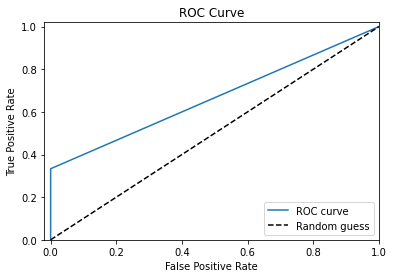

In [49]:
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [50]:
metrics.roc_auc_score(y_test,y_pred) #AUC - Area Under the ROC Curve

0.6666666666666666

The area under the ROC curve (usually denoted by AUC) is a good measure of the performance of the classification algorithm. If it is near 0.5, the classifier is not much better than random guessing, whereas it gets better as the area gets close to 1.

The AUC is indeed quite close to 1, and so our classifier is very good at minimizing false negatives and true negatives.

## Precision - Recall Curve

As with the ROC curve, each point in the plot corresponds to a different threshold. Threshold equal to 0 implies that the recall is 1, whereas threshold equal to 1 implies that the recall is 0, so the threshold varies from 0 to 1 from the top-left to the bottom-right of the plot.

With the precision-recall curve, the closer it is to the top-right corner, the better the algorithm. And hence a larger area under the curve (AUC) indicates that the algorithm has higher recall and higher precision

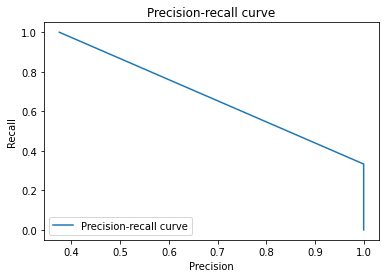

In [52]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred)

plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")